In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path =r'C:\Users\munaf\OneDrive - presidencyuniversity.in\Desktop\IOT Project\rose_classification\train'
data_test_path =r'C:\Users\munaf\OneDrive - presidencyuniversity.in\Desktop\IOT Project\rose_classification\test'
data_val_path =r'C:\Users\munaf\OneDrive - presidencyuniversity.in\Desktop\IOT Project\rose_classification\validation'

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=3,
    validation_split=False)

Found 38 files belonging to 3 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=3,
    validation_split=False)

Found 34 files belonging to 3 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=3,
    validation_split=False)

Found 35 files belonging to 3 classes.


In [9]:
for image, labels in data_train.take(1):
    print(image.shape)

(3, 180, 180, 3)


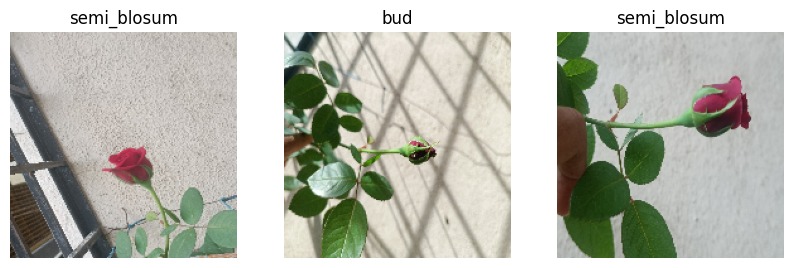

In [10]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    batch_size = image.shape[0]  # This is 3 in your case
    for i in range(batch_size):  # Ensure you only loop over the available images
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i].numpy()])  # Assuming labels is a TensorFlow tensor, convert it to NumPy
        plt.axis('off')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])
model.summary()


C:\Users\munaf\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size,)

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.3239 - loss: 3.2079 - val_accuracy: 0.5294 - val_loss: 1.0212
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.7335 - loss: 0.9564 - val_accuracy: 0.9706 - val_loss: 0.5143
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9053 - loss: 0.4771 - val_accuracy: 1.0000 - val_loss: 0.1576
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 1.0000 - loss: 0.1341 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 0.0240
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.9662 - loss: 0.0649 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 1.

Text(0.5, 1.0, 'Loss')

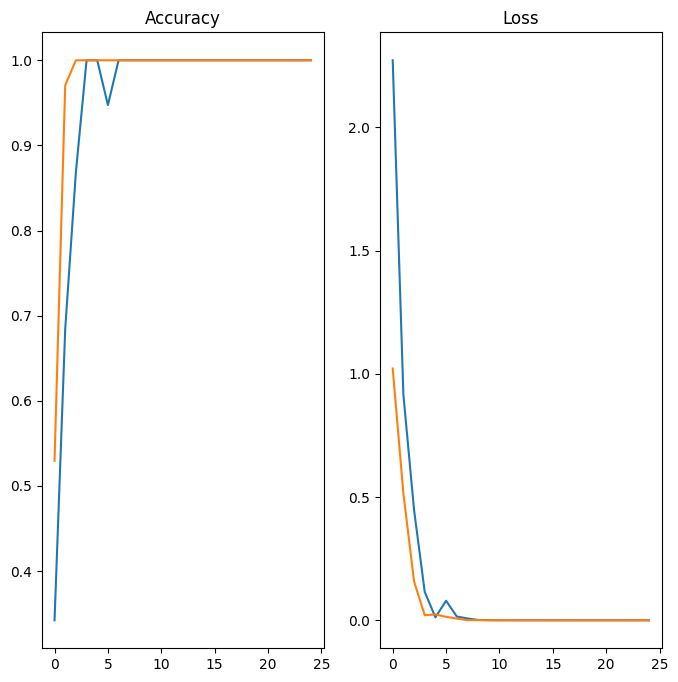

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')


In [29]:
image = r"C:\Users\munaf\OneDrive - presidencyuniversity.in\Desktop\New folder\download.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [30]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [31]:
score = tf.nn.softmax(predict)

In [32]:
print('bud/semiblosum/blosum in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

bud/semiblosum/blosum in image is blosum with accuracy of 100.00


In [33]:
test_loss, test_acc = model.evaluate(data_test)
print(f'Test accuracy: {test_acc}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 1.0000 - loss: 1.6117e-05 
Test accuracy: 1.0


In [34]:
model.save('flower_classification_model.keras')

In [40]:
image_path = r"C:\Users\munaf\OneDrive - presidencyuniversity.in\Desktop\New folder\xyz.jpg"
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, axis=0)  
# Create a batch

# Make a prediction
predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Display the result
print("The model predicts this image as '{}' with a confidence of {:.2f}%".format(data_cat[np.argmax(score)], 100 * np.max(score)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The model predicts this image as 'blosum' with a confidence of 99.94%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


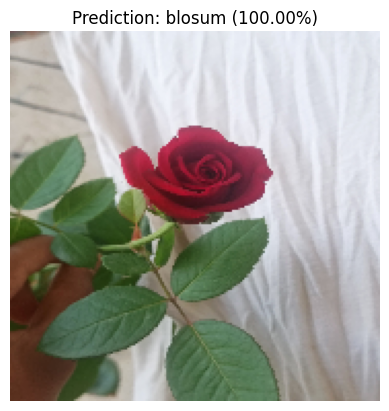

In [42]:
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = r"C:\Users\munaf\OneDrive - presidencyuniversity.in\Desktop\IOT Project\rose_classification\test\blosum\IMG_20241020_104303 - Copy (2).jpg"
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, axis=0)  # Create a batch

# Make a prediction
predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Display the image with the prediction
plt.imshow(image)
plt.title(f"Prediction: {data_cat[np.argmax(score)]} ({100 * np.max(score):.2f}%)")
plt.axis('off')
plt.show()


In [28]:
loaded_model = tf.keras.models.load_model('flower_classification_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


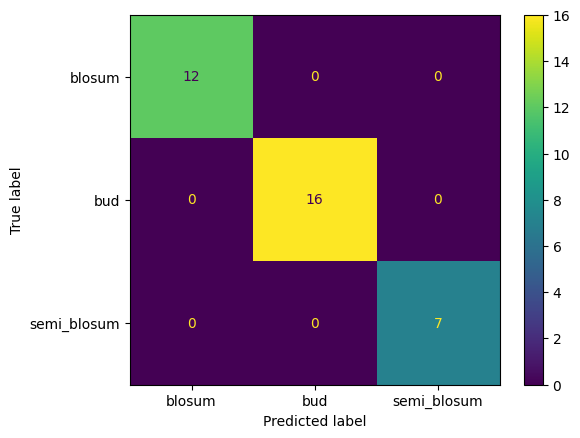

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming `data_test` is your test dataset
y_true = []
y_pred = []

for images, labels in data_test:
    predictions = loaded_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_cat)
disp.plot(cmap='viridis')
plt.show()


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=data_cat))


              precision    recall  f1-score   support

      blosum       1.00      1.00      1.00        12
         bud       1.00      1.00      1.00        16
 semi_blosum       1.00      1.00      1.00         7

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


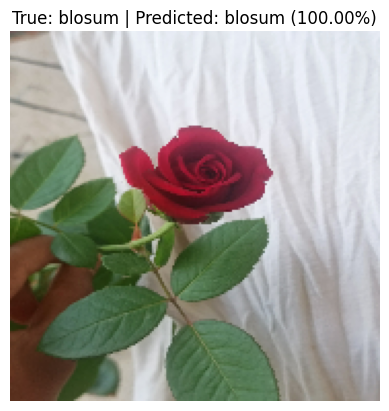

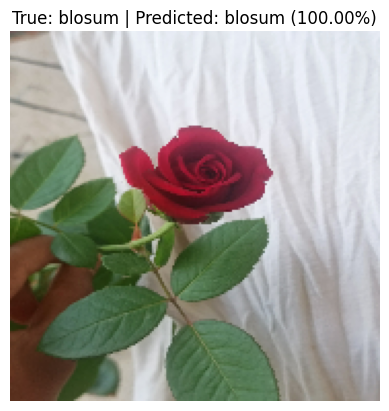

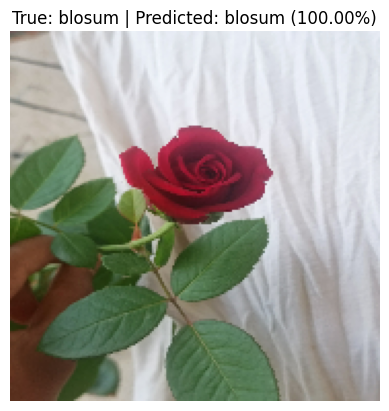

In [46]:
import matplotlib.pyplot as plt

for images, labels in data_test.take(1):  # Taking a batch from the test set
    predictions = loaded_model.predict(images)
    for i in range(len(images)):
        plt.figure()
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_label = data_cat[np.argmax(predictions[i])]
        true_label = data_cat[labels[i].numpy()]
        confidence = 100 * np.max(tf.nn.softmax(predictions[i]))

        plt.title(f"True: {true_label} | Predicted: {predicted_label} ({confidence:.2f}%)")
        plt.axis('off')
        plt.show()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model('flower_classification_model.keras')

# Image dimensions
img_width = 180
img_height = 180

# Open the camera feed
cap = cv2.VideoCapture(0)  # Change '0' if you're using a different camera index

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    img_resized = cv2.resize(frame, (img_width, img_height))
    img_array = tf.keras.utils.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)

    # Model prediction
    predictions = loaded_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_label = data_cat[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Display the result on the frame
    cv2.putText(frame, f"{predicted_label} ({confidence:.2f}%)", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Camera Feed', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()
